/opt/conda/lib/python3.7/site-packages/pyroomacoustics/room.py:1269: UserWarning: Using absorption parameter is deprecated. In the future, use materials instead.
  "Using absorption parameter is deprecated. In the future, use materials instead."


原始音檔=========================================================================================
-95.2310080124943
-95.1839526313147
-93.98095195971662
-96.73992934733378
更改過後的音檔====================================================================================
-27.004112176688146
-27.004112176688146
-27.004112176688146
-27.004112176688146
The measured RT60 is 0.8396250000000001


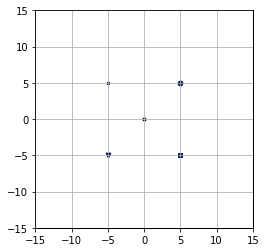

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyroomacoustics as pra
import soundfile as sf

#=========================================================================================
# 創建房間
left_wall = -15
right_wall = 15
top_wall = 15
bottom_wall = -15
absorption = np.random.uniform(low=0.1, high=0.99)

corners = np.array([[left_wall, bottom_wall], [left_wall, top_wall],
                    [   right_wall, top_wall], [right_wall, bottom_wall]]).T

room = pra.Room.from_corners(corners,
        fs=16000,
        max_order=10,
        absorption=absorption)
#=========================================================================================
# 音檔讀取
audio1, fs = sf.read("./samples/1.flac")
audio2, fs = sf.read("./samples/2.flac")
audio3, fs = sf.read("./samples/3.flac")
audio4, fs = sf.read("./samples/4.flac")

length1 = len(audio1)
length2 = len(audio2)
length3 = len(audio3)
length4 = len(audio4)

max_length = max(length1, length2, length3, length4)
#=========================================================================================
# 將音檔長度弄成一致的
if length1 < max_length:
    while len(audio1) < max_length:
        audio1 = np.concatenate((audio1, audio1[:max_length - len(audio1)]))
        
if length2 < max_length:
    while len(audio2) < max_length:
        audio2 = np.concatenate((audio2, audio2[:max_length - len(audio2)]))
        
if length3 < max_length:
    while len(audio3) < max_length:
        audio3 = np.concatenate((audio3, audio3[:max_length - len(audio3)]))

if length4 < max_length:
    while len(audio4) < max_length:
        audio4 = np.concatenate((audio4, audio4[:max_length - len(audio4)]))
#=========================================================================================
print("原始音檔=========================================================================================")
dbfs1 = 20 * np.log10(np.max(np.abs(audio1)) / (2 ** 15))
print(dbfs1)
dbfs2 = 20 * np.log10(np.max(np.abs(audio2)) / (2 ** 15))
print(dbfs2)
dbfs3 = 20 * np.log10(np.max(np.abs(audio3)) / (2 ** 15))
print(dbfs3)
dbfs4 = 20 * np.log10(np.max(np.abs(audio4)) / (2 ** 15))
print(dbfs4)

print("更改過後的音檔====================================================================================")

target_dbfs = dbfs1 + 27
target = dbfs1 - target_dbfs

volume_adjustment = 10 ** ((target - dbfs1) / 20.0)
audio1_adjusted = (audio1 * volume_adjustment).astype(np.int16)
dbfs_audio1_adjusted = 20 * np.log10(np.max(np.abs(audio1_adjusted)) / (2 ** 15))
print(dbfs_audio1_adjusted)

target_dbfs = dbfs2 + 27
target = dbfs2 - target_dbfs

volume_adjustment = 10 ** ((target - dbfs2) / 20.0)
audio2_adjusted = (audio2 * volume_adjustment).astype(np.int16)
dbfs_audio2_adjusted = 20 * np.log10(np.max(np.abs(audio2_adjusted)) / (2 ** 15))
print(dbfs_audio2_adjusted)

target_dbfs = dbfs3 + 27
target = dbfs3 - target_dbfs

volume_adjustment = 10 ** ((target - dbfs3) / 20.0)
audio3_adjusted = (audio3 * volume_adjustment).astype(np.int16)
dbfs_audio3_adjusted = 20 * np.log10(np.max(np.abs(audio3_adjusted)) / (2 ** 15))
print(dbfs_audio3_adjusted)

target_dbfs = dbfs4 + 27
target = dbfs4 - target_dbfs

volume_adjustment = 10 ** ((target - dbfs4) / 20.0)
audio4_adjusted = (audio4 * volume_adjustment).astype(np.int16)
dbfs_audio4_adjusted = 20 * np.log10(np.max(np.abs(audio4_adjusted)) / (2 ** 15))
print(dbfs_audio4_adjusted)

#=========================================================================================
# 音檔輸入
# 第一象限
room.add_source([5, 5],   signal=audio1)
# 第二象限
room.add_source([5, -5],  signal=audio2)
# 第三象限
room.add_source([-5, -5], signal=audio3)
# 第四象限
room.add_source([-5, 5],  signal=audio4)
#=========================================================================================
# 創建麥克風
R = pra.circular_2D_array(center=[0., 0.], M=4, phi0=0, radius=.03231)
room.add_microphone_array(pra.MicrophoneArray(R, 16000))

room.simulate()
#=========================================================================================
# 存檔的位置
room.mic_array.to_wav(
    f"/workspace/Cone-of-Silence/test.wav",
    norm=True,
    bitdepth=np.int16,
)
#=========================================================================================
# 評量方式
rt60 = room.measure_rt60()
print("The measured RT60 is {}".format(rt60[1, 0]))
#=========================================================================================
# 畫出房間的圖
fig, ax = room.plot()
plt.grid()
plt.show()